In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Загрузим и предобработаем при необходимости данные из тренировочного датасета

In [76]:
df = pd.read_csv('train.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [78]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


Выберим колонки, которые мы будем использовать в качестве признаков для обучения модели и целевую переменную

In [79]:
df.head(10)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
5,5,33.0,4.0,1650.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0
6,6,53.0,1.0,2100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0
7,7,60.0,3.0,1800.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
8,8,39.0,1.0,1200.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,57.0
9,9,49.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0


In [80]:
df['est'] = df['physics'] + df['chemistry'] + df['biology']
df['hum'] = df['english'] + df['geography'] + df['history']

In [81]:
df_est_mean = df.groupby(df['est'])['mean_exam_points'].mean().reset_index()
df_est_mean = df_est_mean.rename(columns={'mean_exam_points': 'df_est_mean_mean_exam_points'})
df_est_mean

,est,df_est_mean_mean_exam_points
0,0.0,62.076860
1,1.0,66.324657
2,2.0,67.023681
3,3.0,69.571429


In [82]:
df_hum_mean = df.groupby(df['hum'])['mean_exam_points'].mean().reset_index()
df_hum_mean = df_hum_mean.rename(columns={'mean_exam_points': 'df_hum_mean_mean_exam_points'})
df_hum_mean

,hum,df_hum_mean_mean_exam_points
0,0.0,64.266266
1,1.0,64.937751
2,2.0,67.000000


In [83]:
df_years_of_experience = df.groupby(df['years_of_experience'])['mean_exam_points'].mean().reset_index()
df_years_of_experience = df_years_of_experience.rename(columns={'mean_exam_points': 'df_years_of_experience_mean_exam_points'})
df_years_of_experience

,years_of_experience,df_years_of_experience_mean_exam_points
0,0.0,62.338241
1,1.0,62.178714
2,2.0,62.285477
3,3.0,65.374682
4,4.0,68.924242
5,5.0,70.296233
6,6.0,72.925532
7,7.0,68.328571
8,8.0,68.850000
9,9.0,72.333333


In [84]:
df_lesson_price = df.groupby(df['years_of_experience'])['lesson_price'].mean().reset_index()
df_lesson_price = df_lesson_price.rename(columns={'lesson_price': 'mean_lesson_price'})
df_lesson_price

,years_of_experience,mean_lesson_price
0,0.0,1596.499102
1,1.0,1616.334661
2,2.0,1606.236142
3,3.0,1741.857506
4,4.0,1902.673797
5,5.0,1990.154110
6,6.0,2101.063830
7,7.0,1917.857143
8,8.0,1880.000000
9,9.0,1633.333333


In [85]:
df = df.merge(df_est_mean, how='left')
df = df.merge(df_hum_mean, how='left')
df = df.merge(df_years_of_experience, how='left')
df = df.merge(df_lesson_price, how='left')

In [86]:
df.head(10)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,est,hum,df_est_mean_mean_exam_points,df_hum_mean_mean_exam_points,df_years_of_experience_mean_exam_points,mean_lesson_price
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,1.0,1.0,66.324657,64.937751,62.338241,1596.499102
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0,1.0,0.0,66.324657,64.266266,68.924242,1902.673797
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,62.076860,64.266266,62.338241,1596.499102
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,62.076860,64.266266,70.296233,1990.154110
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,62.076860,64.266266,62.178714,1616.334661
5,5,33.0,4.0,1650.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,0.0,62.076860,64.266266,68.924242,1902.673797
6,6,53.0,1.0,2100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0,62.076860,64.266266,62.178714,1616.334661
7,7,60.0,3.0,1800.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,62.076860,64.266266,65.374682,1741.857506
8,8,39.0,1.0,1200.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,57.0,1.0,0.0,66.324657,64.266266,62.178714,1616.334661
9,9,49.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,62.076860,64.266266,70.296233,1990.154110


In [87]:
#def feat_eng(df):
#    
#    df['est'] = df['physics'] + df['chemistry'] + df['biology']
#    df['hum'] = df['english'] + df['geography'] + df['history']
    
#    df_est_mean = df.groupby(df['est'])['mean_exam_points'].mean().reset_index()
#    df_est_mean = df_est_mean.rename(columns={'mean_exam_points': 'df_est_mean_mean_exam_points'})
    
#    df_lesson_price = df.groupby(df['years_of_experience'])['lesson_price'].mean().reset_index()
#    df_lesson_price = df_lesson_price.rename(columns={'lesson_price': 'mean_lesson_price'})
    
#    df = df.merge(df_est_mean, how='left')
#    df = df.merge(df_hum_mean, how='left')
#    df = df.merge(df_years_of_experience, how='left')
#    df = df.merge(df_lesson_price, how='left') 
    
    
    

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
Id                                         10000 non-null int64
age                                        10000 non-null float64
years_of_experience                        10000 non-null float64
lesson_price                               10000 non-null float64
qualification                              10000 non-null float64
physics                                    10000 non-null float64
chemistry                                  10000 non-null float64
biology                                    10000 non-null float64
english                                    10000 non-null float64
geography                                  10000 non-null float64
history                                    10000 non-null float64
mean_exam_points                           10000 non-null float64
est                                        10000 non-null float64
hum                                 

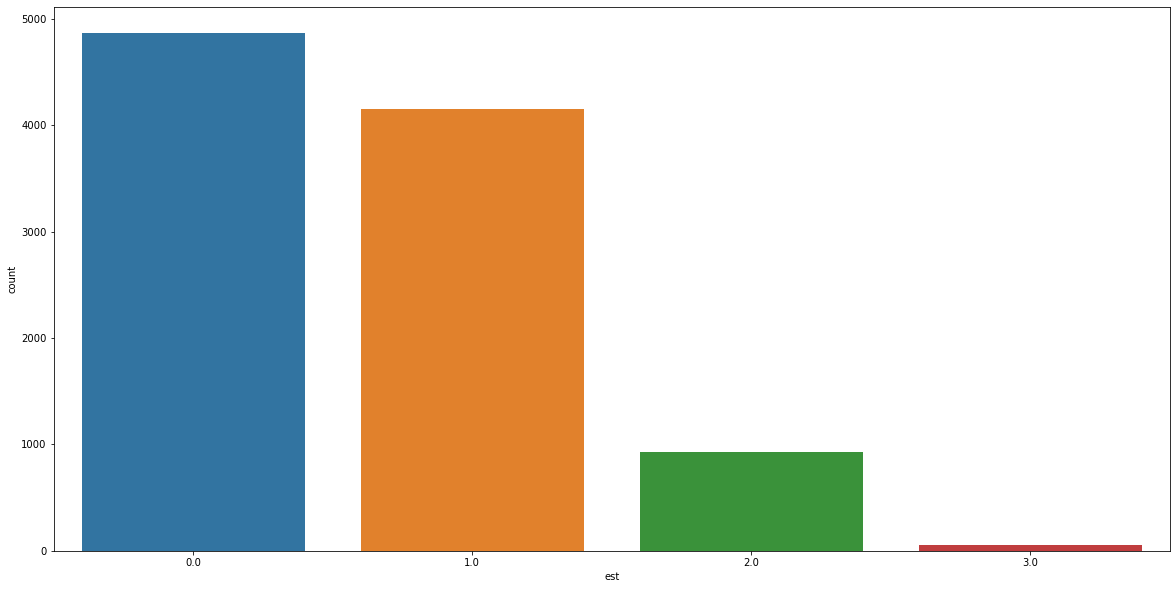

In [89]:
plt.figure(figsize = (20, 10))
sns.countplot(df['est'])

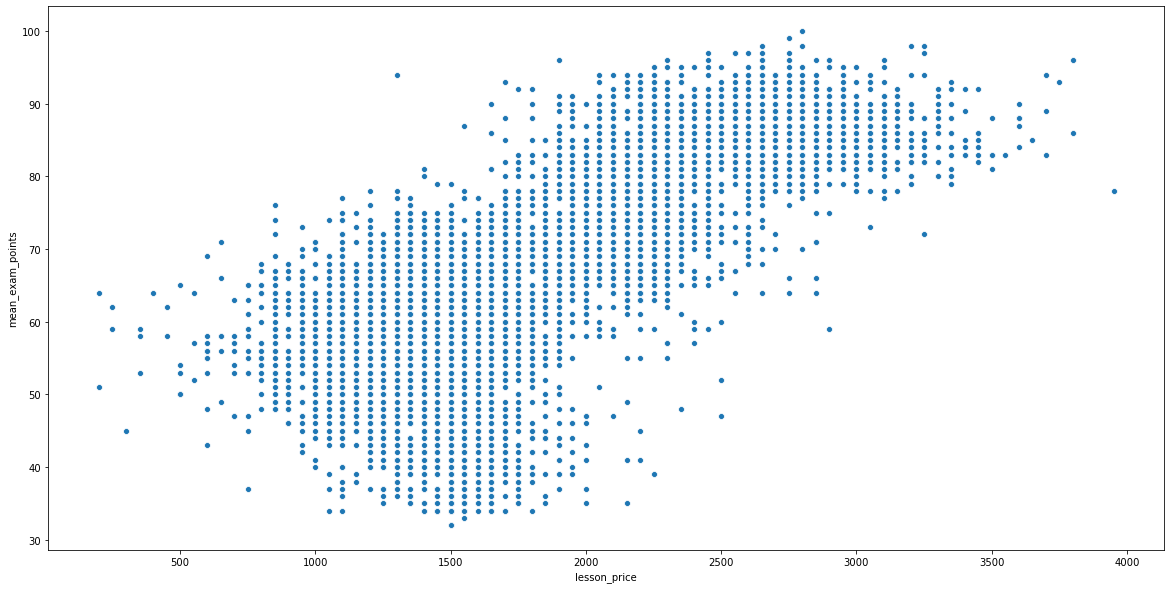

In [90]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = df['lesson_price'], y = df['mean_exam_points'])

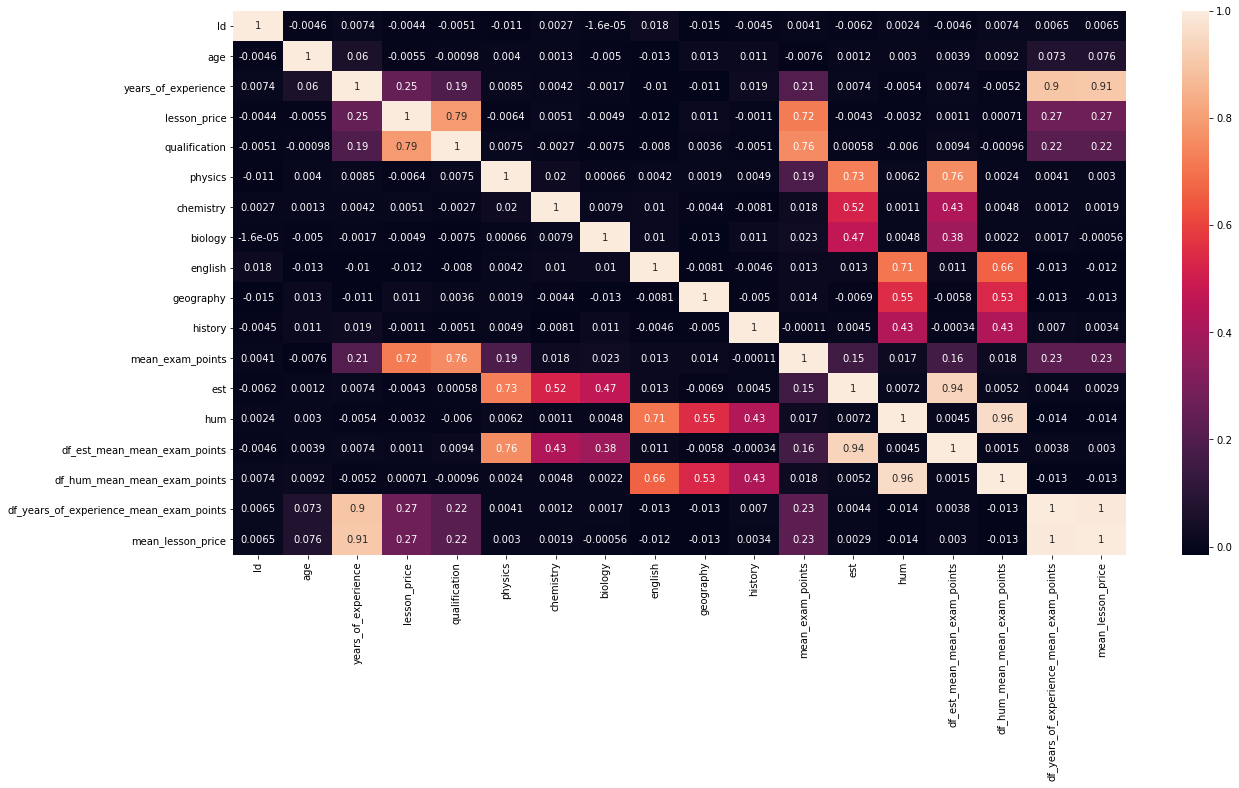

In [91]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

In [92]:
TARGET_NAME = 'mean_exam_points'
FEATURE_NAMES = ['age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history']

#FEATURE_NAMES = ['lesson_price', 'df_years_of_experience_mean_exam_points', 'df_est_mean_mean_exam_points', 'df_hum_mean_mean_exam_points', 'mean_lesson_price']



In [93]:
# Теперь приведём наши данные к формату np.array
X = df[FEATURE_NAMES].values
y = df[TARGET_NAME].values

print(X.shape, y.shape)

(10000, 10) (10000,)


In [94]:
df[FEATURE_NAMES]

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Реализуем алгаритм градиентного бустинга

In [95]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [96]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        #  найдем значение как среднее по выборке   
        prediction = np.mean(self.labels)
        return prediction

In [97]:
# И класс дерева
class Tree:

  def __init__(self, max_depth=50):
    self.max_depth = max_depth
    self.tree = None

  # Расчёт дисперсии значений
  def dispersion(self, labels):
    return np.std(labels)

  # Расчет качества

  def quality(self, left_labels, right_labels, current_dispersion):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_dispersion - p * self.dispersion(left_labels) - (1 - p) * self.dispersion(right_labels)

    # Разбиение датасета в узле

  def split(self, data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

    # Нахождение наилучшего разбиения

  def find_best_split(self, data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_dispersion = self.dispersion(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
      # будем проверять только уникальные значения признака, исключая повторения
      t_values = np.unique([row[index] for row in data])
      
      for t in t_values:
        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
        #  пропускаем разбиения, в которых в узле остается менее 5 объектов
        if len(true_data) < min_leaf or len(false_data) < min_leaf:
          continue
        
        current_quality = self.quality(true_labels, false_labels, current_dispersion)
        
        #  выбираем порог, на котором получается максимальный прирост качества
        if current_quality > best_quality:
          best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

    # Построение дерева с помощью рекурсивной функции

  def build_tree(self, data, labels, tree_depth, max_depth):

    quality, t, index = self.find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
      return Leaf(data, labels)

    # Базовый случай (2) - прекращаем рекурсию, когда достигнута максимальная глубина дерева
    if tree_depth >= max_depth:
      return Leaf(data, labels)

    # Увеличиваем глубину дерева на 1
    tree_depth += 1

    true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = self.build_tree(true_data, true_labels, tree_depth, max_depth)
    false_branch = self.build_tree(false_data, false_labels, tree_depth, max_depth)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

  def predict_object(self, obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
      answer = node.prediction
      return answer

    if obj[node.index] <= node.t:
      return self.predict_object(obj, node.true_branch)
    else:
      return self.predict_object(obj, node.false_branch)

  def predict(self, data):
    
    val = []
    for obj in data:
      prediction = self.predict_object(obj, self.tree)
      val.append(prediction)
    return val

  def fit(self, data, labels):
    self.tree = self.build_tree(data, labels, 0, self.max_depth)
    return self

In [98]:
class GradientBoosting:
  
  def __init__(self, n_trees, max_depth, coefs, eta):
    self.n_trees = n_trees
    self.max_depth = max_depth
    self.coefs = coefs
    self.eta = eta
    self.trees = []

  def bias(self, y, z):
    return (y - z)

  def fit(self, X_train, y_train):
    
    # Деревья будем записывать в список
    trees = []
    
    for i in range(self.n_trees):
        tree = Tree(max_depth=self.max_depth)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(self.trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
        else:
            # Получим ответы на текущей композиции
            target = self.predict(X_train)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            bias = self.bias(y_train, target)
            tree.fit(X_train, bias)

        self.trees.append(tree)
        
    return self

  def predict(self, X):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([self.eta* coef * alg.predict([x])[0] for alg, coef in zip(self.trees, self.coefs)]) for x in X])

In [99]:
def r_2(y_pred, y_true):
  numerator = ((y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
  denominator = ((y_true - np.average(y_true)) ** 2).sum(axis=0,
                                                          dtype=np.float64)
  return 1 - (numerator / denominator)

# Проверим качество предсказания модели на обучающей и валидационной выборке

In [100]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                                                                    test_size = 0.3,
                                                                    random_state = 1)

In [177]:
# Число деревьев в ансамбле
n_trees = 25

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 5

# Шаг
eta = 0.4

In [178]:
gb = GradientBoosting(n_trees, max_depth, coefs, eta)
gb.fit(train_data, train_labels)
train_answers = gb.predict(train_data)
test_answers = gb.predict(test_data)

In [179]:
r_2(test_answers, test_labels)

0.7741652232817823

In [180]:
r_2(train_answers, train_labels)

0.7957820725318074

# Модель показала достаточное качество как на тренировочной так и на валидационной выборке, так что обучим финальную модель на всём датасете

In [181]:
gb_final = GradientBoosting(n_trees, max_depth, coefs, eta)
gb_final.fit(X, y)

# Загрузим тестовый датасет и сделаем для него предсказания

In [182]:
df_test = pd.read_csv('test.csv')

In [183]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [184]:
# Теперь приведём наши данные к формату np.array
X_test = df_test[FEATURE_NAMES].values

print(X_test.shape)

(10000, 10)


In [185]:
test_pred = gb_final.predict(X_test)

In [186]:
submissions = pd.concat([df_test['Id'], pd.Series(test_pred)], axis=1)
submissions = submissions.rename(columns={0: 'mean_exam_points'})

In [187]:
submissions.to_csv('VPavlov_predictions_1.csv',index=None)